# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

## 1. Find the linear regression equation for this data for brain weight to body weight.

In [3]:
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [4]:
# checking the shape 

df.shape

(62, 2)

In [5]:
# checking null values
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [6]:
# checking any duplicates are there

df.duplicated().sum()

0

In [7]:
# checking the datatypes
df.dtypes

Brain    float64
Body     float64
dtype: object

In [8]:
# checking for the statistical information

df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


# Expolatory data analysis

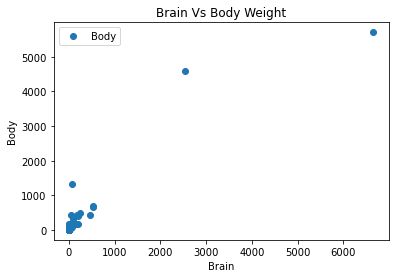

In [9]:
df.plot(x = 'Brain', y = 'Body', style = 'o')
plt.title('Brain Vs Body Weight')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

## 2. Chart the original data and the equation on the chart.

In [10]:
x = df[['Brain']].values
y = df['Body'].values

from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y , test_size= 0.3)

In [12]:
x_train.shape, x_test.shape

((43, 1), (19, 1))

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()


regressor.fit(x_train, y_train)

LinearRegression()

In [13]:
print(regressor.intercept_)

64.0317926228065


In [14]:
print(regressor.coef_)

[1.19087187]


In [15]:
print(regressor.predict([[1]]))

[65.2226645]


## Chart the original data and the equation on the chart.

In [16]:
y_pred = regressor.predict(x_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([  64.05918268,   64.36523675,  286.84392004,   65.71092196,
         64.10324494,   69.13825121,   64.53791317,  107.29616776,
         76.59549088,   64.1556433 ,   64.15207068,   64.17469725,
         65.27029937,   64.04370134, 3097.18245284,   81.6924225 ,
       7988.09323475,   72.12972136,   65.12739475])

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0.40,64.059183
1,1.90,64.365237
2,419.00,286.843920
3,17.50,65.710922
4,1.00,64.103245
5,39.20,69.138251
6,6.40,64.537913
7,119.50,107.296168
8,179.50,76.595491
9,2.50,64.155643


## 3. Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [18]:
from sklearn import metrics 
regressor.score(x_test,y_test)

0.8406390503428187